In [3]:
# ===================================================================
# Step 1: All Imports and Data Loading
# ===================================================================
import sys
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
from transformers import InformerConfig, InformerForPrediction
from one.api import ONE

# --- Ensure custom utils are in the path ---
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from utils.load_meso_session import MesoscopeSession

print("STEP 1: Loading data from IBL...")

# --- Load the real session data ---
one = ONE()
SESSION_INDEX = 0
# session = MesoscopeSession.from_csv(one, '../good_mesoscope_sessions_final.csv', SESSION_INDEX,)
# Using a 1000s window as in your example. You can remove the time_window argument to use the full session.
# activity_matrix, timestamps = session.get_activity_matrix(time_window=1000)
activity_matrix, timestamps, eid = MesoscopeSession.load_session_from_hdf5('../DATA/activity_raw.h5')

# --- Confirm data was loaded ---
print(f"Successfully loaded data. Activity matrix shape: {activity_matrix.shape}")


STEP 1: Loading data from IBL...
Activity matrix loaded from ../DATA/activity_raw.h5
Shape: (19081, 7673) (time_points x neurons)
Metadata: {'date': '2025-04-09T12:10:56.318000', 'duration_hours': np.float64(1.0843897222222223), 'eid': '61f260e7-b5d3-4865-a577-bcfc53fda8a8', 'n_total_neurons': np.int64(7673), 'shape_description': 'activity_matrix: [time_points, neurons], timestamps: [time_points]', 'subject': 'SP066', 'task_protocol': '_iblrig_tasks_biasedChoiceWorld8.27.6/_sp_passiveVideo8.27.6', 'time_window': 'full_session'}
Successfully loaded data. Activity matrix shape: (19081, 7673)


In [14]:
import pandas as pd
# pd.DataFrame(activity_matrix).to_csv('../DATA/activity_raw.csv')
df_raw = pd.DataFrame(activity_matrix)

cols = list(df_raw.columns)
print(cols)
cols.remove(cols[-1])

df_raw[0:100]
# cols.remove('date')
# df_raw = df_raw[['date'] + cols + [self.target]]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

,0,1,2,3,4,5,6,7,8,9,...,7663,7664,7665,7666,7667,7668,7669,7670,7671,7672
0,5829.507812,813.864929,24296.914062,2230.694092,3061.062744,1640.665405,5884.758301,1720.631958,1610.830078,1091.118408,...,545.153259,803.978333,1125.288574,1997.297729,288.833252,2197.104492,1021.499512,2168.323486,1109.098022,850.557373
1,5416.209961,747.288513,23340.478516,2223.250488,2630.042480,1266.943359,5450.277832,1796.281494,964.787170,866.484070,...,549.346619,808.241272,896.918701,1890.214844,377.868683,2048.964111,950.675781,1959.962646,1009.570801,865.027771
2,5522.308105,719.012207,22618.082031,1786.516479,3054.557129,2321.899902,5480.202148,1814.186646,1127.838745,771.277222,...,616.382080,801.875671,1146.723877,1752.614868,294.360931,2428.318359,959.091858,1806.824829,1038.911987,931.183105
3,4602.706543,860.699524,23809.046875,1931.943970,2185.181396,2122.453369,5816.941895,1994.287109,1237.374023,954.936584,...,571.174194,817.972229,994.891235,1703.971924,399.325745,2128.304443,957.021118,1378.779053,1199.442871,936.509766
4,6387.721191,965.405151,18892.835938,1644.547363,3604.623047,2647.681396,5120.916992,1658.087280,1111.690063,854.513794,...,409.974457,825.132874,1081.058228,1546.444946,297.458954,2760.471924,1163.486450,1644.969971,1008.484985,863.018860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14335.299805,574.426270,12852.985352,1386.921265,4077.477051,3465.484375,3651.800049,1578.841309,877.516357,3607.984863,...,576.809509,792.600952,932.068665,1489.671875,415.352661,2312.635742,892.202637,1685.933105,1091.357910,606.000000
96,5232.547852,900.953186,20874.755859,3809.422363,2717.765625,3248.951904,3350.020020,1260.545410,1135.573730,4755.155273,...,501.714691,747.397583,1000.872498,1390.034790,363.604706,2733.726562,887.735291,1753.503906,1356.356689,699.055542
97,11302.865234,674.791870,15061.600586,2698.817627,4142.523926,3994.128174,2680.084961,1581.960571,1133.257446,2870.912598,...,590.156311,734.130981,1008.279053,1131.149780,424.413940,2649.518555,734.056885,1807.445923,1347.089600,1016.485535
98,5203.271973,708.787048,17929.982422,3628.239746,2081.066895,2348.634277,2262.129395,1497.726318,1044.024536,4696.619141,...,573.000977,673.480957,901.615601,2037.418335,347.461426,1778.646484,931.939514,2193.410156,1372.361328,1045.580566


In [ ]:

# ===================================================================
# Step 2: Robust, Per-Neuron Normalization
# ===================================================================
print("\nSTEP 2: Normalizing the activity matrix...")

activity_matrix_normalized = activity_matrix.copy()
lower_percentile = 0
upper_percentile = 99.5
min_vals = np.percentile(activity_matrix_normalized, lower_percentile, axis=0)
max_vals = np.percentile(activity_matrix_normalized, upper_percentile, axis=0)
epsilon = 1e-6
denominator = max_vals - min_vals
denominator[denominator < epsilon] = epsilon
activity_matrix_normalized = (activity_matrix_normalized - min_vals) / denominator
activity_matrix_normalized = np.clip(activity_matrix_normalized, 0, 1)

print("Normalization complete.")


# ===================================================================
# Step 3: Data Preparation (Windowing)
# ===================================================================
print("\nSTEP 3: Preparing data windows for the Transformer...")

# --- Define Model/Data Parameters ---
context_length = int(20 * 4.9)  # Use 10 seconds of history (49 samples)
prediction_length = 1#int(2 * 4.9)  # Predict the next 2 seconds (~1 samples)
num_neurons = activity_matrix_normalized.shape[1]

# In Step 3, when you define the config:
config = InformerConfig(
    prediction_length=prediction_length,
    context_length=context_length,
    input_size=num_neurons,
    num_time_features=1,
    
    # Increase model capacity
    d_model=128,             # Was 64
    encoder_layers=4,        # Was 3
    decoder_layers=4,        # Was 3
    encoder_attention_heads=8, # Was 4
    decoder_attention_heads=8, # Was 4
    encoder_ffn_dim=256,     # Was 128
    decoder_ffn_dim=256,     # Was 128
)

# --- Create the sliding windows ---
max_lag = max(config.lags_sequence)
past_sequence_length = context_length + max_lag

past_values_list = []
future_values_list = []
past_time_features_list = []
future_time_features_list = []

# Create a normalized time feature (from 0 to 1)
time_feature = timestamps / timestamps.max()

# Loop through the normalized data to create windows
for i in range(len(activity_matrix_normalized) - past_sequence_length - prediction_length + 1):
    past_start_idx, past_end_idx = i, i + past_sequence_length
    future_start_idx, future_end_idx = past_end_idx, past_end_idx + prediction_length

    past_values_list.append(activity_matrix_normalized[past_start_idx:past_end_idx, :])
    future_values_list.append(activity_matrix_normalized[future_start_idx:future_end_idx, :])
    
    past_time_features_list.append(time_feature[past_start_idx:past_end_idx, np.newaxis])
    future_time_features_list.append(time_feature[future_start_idx:future_end_idx, np.newaxis])

# --- Convert lists to PyTorch Tensors ---
past_values = torch.from_numpy(np.array(past_values_list, dtype=np.float32))
future_values = torch.from_numpy(np.array(future_values_list, dtype=np.float32))
past_time_features = torch.from_numpy(np.array(past_time_features_list, dtype=np.float32))
future_time_features = torch.from_numpy(np.array(future_time_features_list, dtype=np.float32))
past_observed_mask = torch.ones_like(past_values)

print(f"Data prepared. Total samples: {len(past_values)}. Tensor shape: {past_values.shape}")




STEP 2: Normalizing the activity matrix...
Normalization complete.

STEP 3: Preparing data windows for the Transformer...
Data prepared. Total samples: 4810. Tensor shape: torch.Size([4810, 56, 7673])


In [5]:
import torch
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# ===================================================================
# (Your data loading, normalization, and preparation code goes here)
# ...
# past_values, future_values, etc. are created as before
# ...
# ===================================================================

# ===================================================================
# Step 4: Split Data and Set Up DataLoaders
# ===================================================================
print("\nSTEP 4: Splitting data and setting up DataLoaders...")

# --- Create a list of indices to split ---
# This ensures all tensors are split consistently.
num_samples = len(past_values)
indices = list(range(num_samples))

# --- Split indices into training and validation sets (90/10 split) ---
train_indices, val_indices = train_test_split(indices, test_size=0.1, random_state=42, shuffle=True)

# --- Create Training Datasets and DataLoader ---
train_dataset = TensorDataset(
    past_values[train_indices],
    past_time_features[train_indices],
    future_values[train_indices],
    future_time_features[train_indices],
    past_observed_mask[train_indices]
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# --- Create Validation Datasets and DataLoader ---
val_dataset = TensorDataset(
    past_values[val_indices],
    past_time_features[val_indices],
    future_values[val_indices],
    future_time_features[val_indices],
    past_observed_mask[val_indices]
)
# No need to shuffle the validation loader
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Data split: {len(train_indices)} training samples, {len(val_indices)} validation samples.")

# --- Setup Model and Optimizer ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = InformerForPrediction(config)
model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# --- Hyperparameters for the fix ---
SPIKE_WEIGHT = 100.0
SPIKE_THRESHOLD = 0.1
# A new hyperparameter (lambda) to control the penalty on small scales.
# Start with a small value and increase if the loss still runs away.
SCALE_REG_WEIGHT = 0.05 

# ===================================================================
# Step 5: Training & Validation Loop with Scale Regularization
# ===================================================================
print("\nSTEP 5: Starting Training & Validation Loop with SCALE REGULARIZATION...")
epochs = 20

for epoch in range(epochs):
    # --- Training Phase ---
    model.train()
    # Track individual loss components for better logging
    cumulative_nll_loss = 0
    cumulative_scale_loss = 0
    cumulative_total_loss = 0

    for i, batch in enumerate(train_loader):
        p_vals, p_time, f_vals, f_time, p_obs_mask = [b.to(device) for b in batch]
        optimizer.zero_grad()
        
        # --- Get Model Outputs ---
        outputs = model.model(past_values=p_vals, past_time_features=p_time, past_observed_mask=p_obs_mask, future_values=f_vals, future_time_features=f_time, return_dict=True)
        params = model.parameter_projection(outputs.last_hidden_state)
        distribution = model.output_distribution(params, loc=outputs.loc, scale=outputs.scale)
        
        # --- 1. Calculate Weighted NLL Loss ---
        unreduced_loss = -distribution.log_prob(f_vals)
        timestep_has_spike = torch.any(f_vals > SPIKE_THRESHOLD, dim=-1)
        timestep_weights = torch.ones_like(unreduced_loss)
        timestep_weights[timestep_has_spike] = SPIKE_WEIGHT
        weighted_nll_tensor = unreduced_loss * timestep_weights
        weighted_nll_loss = weighted_nll_tensor.mean()
        
        # --- 2. Calculate Scale Regularization Loss ---
        # Get the scale parameter directly from the distribution object
        # We add a small epsilon for numerical stability in case scale is exactly zero
        scale = distribution.scale + 1e-8
        # The penalty is the negative log of the scale. It punishes small scales.
        scale_reg_loss = torch.mean(-torch.log(scale))
        
        # --- 3. Combine the two loss terms ---
        # The final loss is the weighted NLL plus the scaled regularization penalty
        loss = weighted_nll_loss + (SCALE_REG_WEIGHT * scale_reg_loss)
        
        # --- Backpropagation ---
        loss.backward()
        optimizer.step()
        
        # --- Logging ---
        cumulative_nll_loss += weighted_nll_loss.item()
        cumulative_scale_loss += scale_reg_loss.item()
        cumulative_total_loss += loss.item()

        # Print detailed progress for every 50 batches
        if (i + 1) % 50 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Batch [{i+1}/{len(train_loader)}], "
                  f"Total Loss: {loss.item():.2f} "
                  f"(NLL: {weighted_nll_loss.item():.2f}, Scale Pen: {scale_reg_loss.item():.2f})")

    # Calculate average losses for the epoch
    avg_train_loss = cumulative_total_loss / len(train_loader)
    avg_nll_loss = cumulative_nll_loss / len(train_loader)
    avg_scale_loss = cumulative_scale_loss / len(train_loader)

    # --- Validation Phase ---
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            p_vals, p_time, f_vals, f_time, p_obs_mask = [b.to(device) for b in batch]
            
            outputs = model.model(past_values=p_vals, past_time_features=p_time, past_observed_mask=p_obs_mask, future_values=f_vals, future_time_features=f_time, return_dict=True)
            params = model.parameter_projection(outputs.last_hidden_state)
            distribution = model.output_distribution(params, loc=outputs.loc, scale=outputs.scale)
            
            # Use the simple, un-weighted NLL for validation to see raw performance
            unweighted_loss = -distribution.log_prob(f_vals).mean()
            total_val_loss += unweighted_loss.item()

    avg_val_loss = total_val_loss / len(val_loader)

    # --- Print Epoch Results ---
    print(f"--- End of Epoch {epoch+1}/{epochs} ---")
    print(f"  Average Training Loss: {avg_train_loss:.4f} (NLL: {avg_nll_loss:.2f}, Scale Pen: {avg_scale_loss:.2f})")
    print(f"  Average Validation Loss (unweighted NLL): {avg_val_loss:.4f}")

print("\n--- Training Complete ---")

# --- Save the trained model for future inference ---
output_dir = "./informer_calcium_model"
model.save_pretrained(output_dir)
print(f"Model saved to '{output_dir}'")


STEP 4: Splitting data and setting up DataLoaders...
Data split: 4329 training samples, 481 validation samples.

STEP 5: Starting Training & Validation Loop with SCALE REGULARIZATION...
Epoch [1/20], Batch [50/136], Total Loss: -1469273.62 (NLL: -1469273.75, Scale Pen: 3.46)
Epoch [1/20], Batch [100/136], Total Loss: -1615617.25 (NLL: -1615617.38, Scale Pen: 3.45)
--- End of Epoch 1/20 ---
  Average Training Loss: -1506952.6728 (NLL: -1506952.80, Scale Pen: 3.43)
  Average Validation Loss (unweighted NLL): -17285.3091
Epoch [2/20], Batch [50/136], Total Loss: -1796833.88 (NLL: -1796834.00, Scale Pen: 3.44)
Epoch [2/20], Batch [100/136], Total Loss: -1894547.00 (NLL: -1894547.12, Scale Pen: 3.42)
--- End of Epoch 2/20 ---
  Average Training Loss: -1849794.1020 (NLL: -1849794.23, Scale Pen: 3.43)
  Average Validation Loss (unweighted NLL): -19648.8752
Epoch [3/20], Batch [50/136], Total Loss: -2040792.12 (NLL: -2040792.25, Scale Pen: 3.44)
Epoch [3/20], Batch [100/136], Total Loss: -206

STEP 1: Loading trained model...
Model loaded and set to evaluation mode.

STEP 2: Preparing a sample and generating forecast...
Forecast generated successfully.

STEP 3: Performing population-level evaluation...
Selected a subset of 100 neurons with highest future variance for analysis.

Sparsity (GT vs. Forecast): 0.64 vs. 1.00
Mean Activity (GT vs. Forecast): 0.2747 vs. 0.0002
Mean Correlation across 100 neurons: -0.033


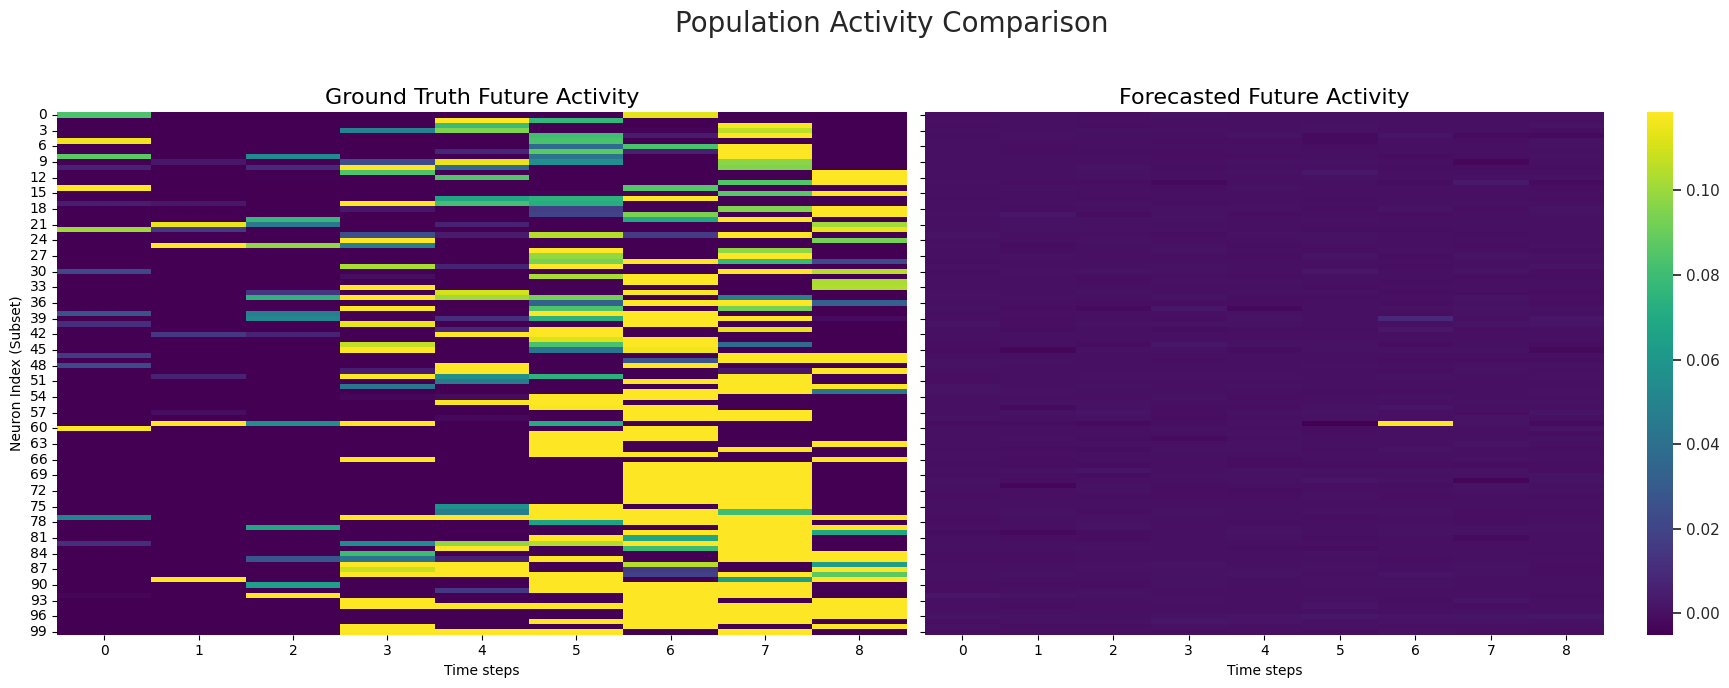

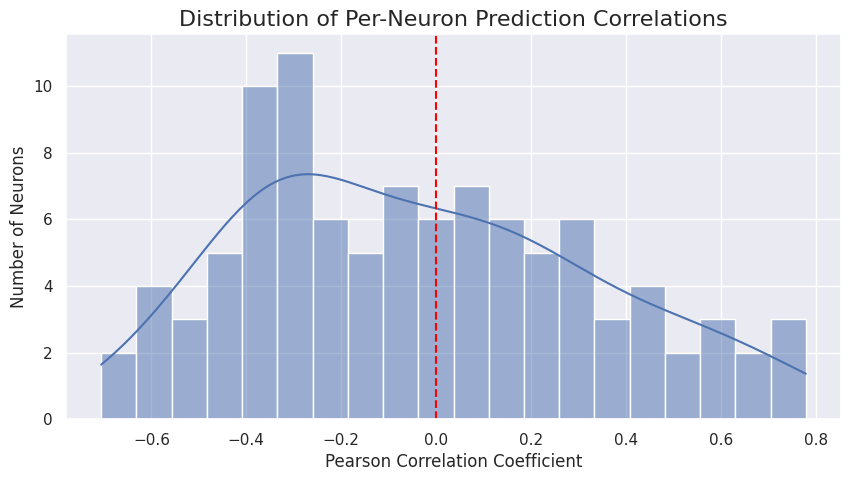

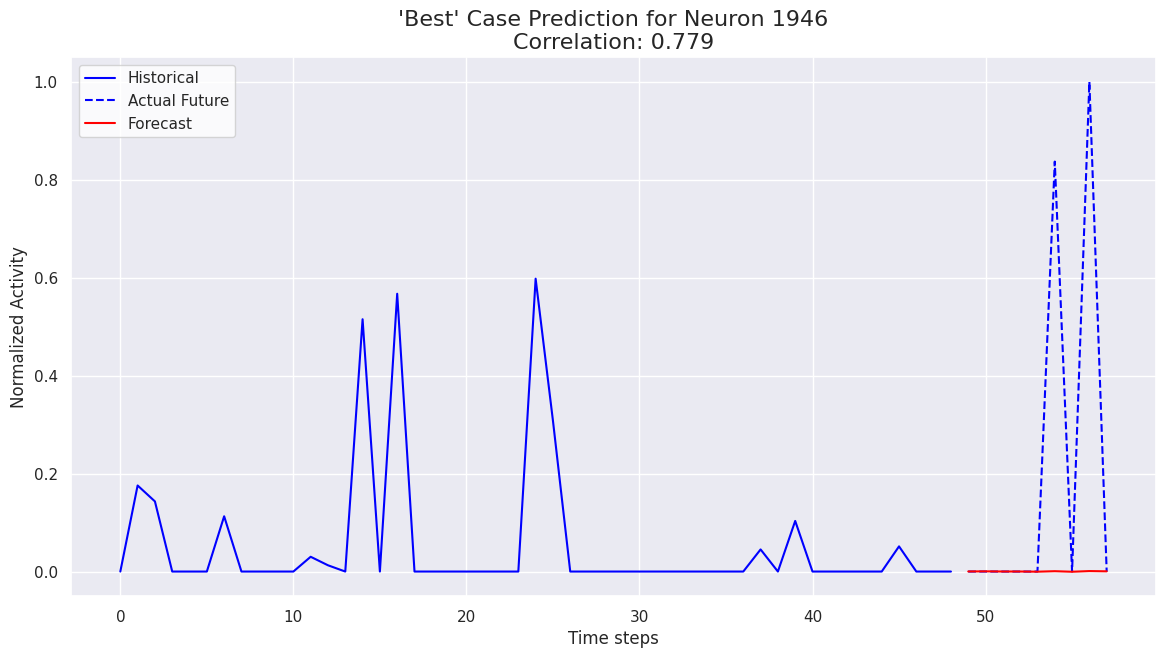

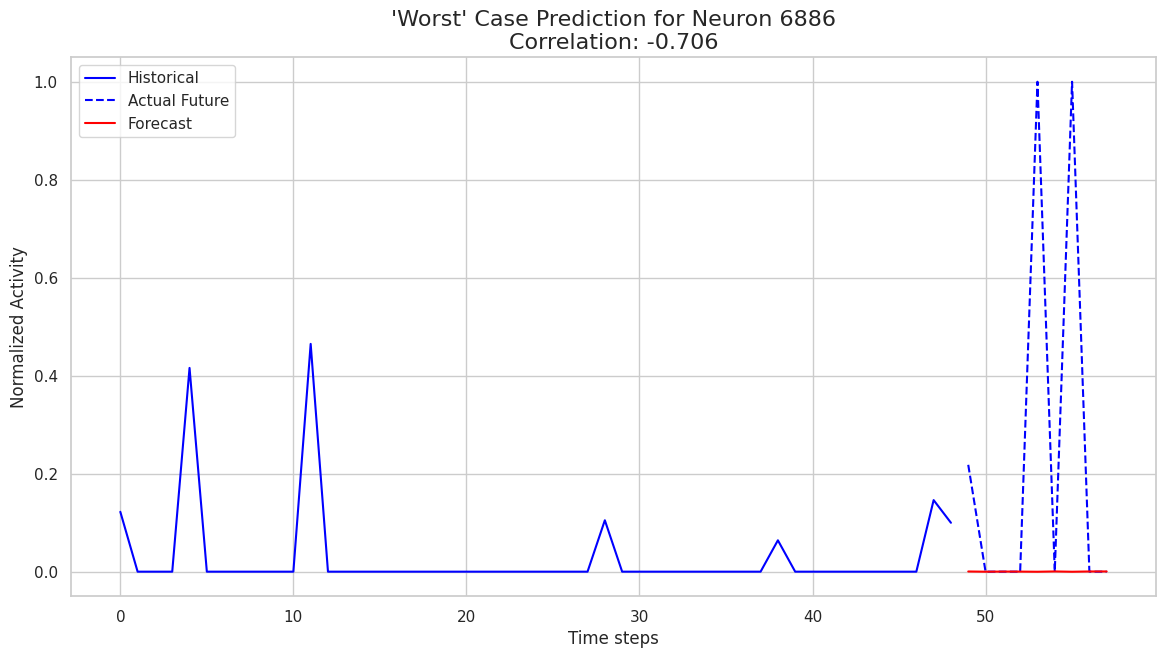

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from transformers import InformerForPrediction
from scipy.stats import pearsonr

# ===================================================================
# Step 1: Load Model & Set to Evaluation Mode (No Changes)
# ===================================================================
print("STEP 1: Loading trained model...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
output_dir = "./informer_calcium_model"
model = InformerForPrediction.from_pretrained(output_dir)
model.to(device)
model.eval()
print("Model loaded and set to evaluation mode.")


# ===================================================================
# Step 2: Select a Sample & Generate Forecast (No Changes)
# ===================================================================
print("\nSTEP 2: Preparing a sample and generating forecast...")
# Let's pick a sample from the original validation set for an honest evaluation
# If you don't have val_indices, you can just pick a random number like 500
try:
    sample_idx = val_indices[25] # Pick a sample from the validation set
except NameError:
    print("val_indices not found, picking a static sample_idx=500 instead.")
    sample_idx = 500

past_val_sample_for_input = past_values[sample_idx]
future_time_sample_for_input = future_time_features[sample_idx]

inference_input = {
    "past_values": past_val_sample_for_input.unsqueeze(0).to(device),
    "past_time_features": past_time_features[sample_idx].unsqueeze(0).to(device),
    "future_time_features": future_time_sample_for_input.unsqueeze(0).to(device)
}
with torch.no_grad():
    outputs = model.generate(**inference_input)
# Move to CPU and remove extra dims for analysis
forecast_sequences = outputs.sequences.mean(dim=1).cpu().squeeze().numpy()
print("Forecast generated successfully.")


# ===================================================================
# Step 3: A More Thorough, Population-Based Evaluation
# ===================================================================
print("\nSTEP 3: Performing population-level evaluation...")

# --- A. Select a Neuron Subset ---
# Let's select the 100 neurons with the most variance in the future window
# This gives us an interesting, active population to analyze.
start_slice = sample_idx
end_slice = sample_idx + past_sequence_length + prediction_length
ground_truth_window = activity_matrix_normalized[start_slice:end_slice, :]
ground_truth_future = ground_truth_window[-prediction_length:]

future_variances = np.var(ground_truth_future, axis=0)
top_100_indices = np.argsort(future_variances)[-100:] # Get indices of top 100

# Slice the data to focus only on this subset
ground_truth_subset = ground_truth_future[:, top_100_indices]
forecast_subset = forecast_sequences[:, top_100_indices]

print(f"Selected a subset of 100 neurons with highest future variance for analysis.")

# --- B. Calculate Population Metrics ---
# Sparsity: What percentage of values are near zero?
gt_sparsity = np.mean(ground_truth_subset < 0.01)
fc_sparsity = np.mean(forecast_subset < 0.01)
print(f"\nSparsity (GT vs. Forecast): {gt_sparsity:.2f} vs. {fc_sparsity:.2f}")

# Mean Activity Level
gt_mean_activity = np.mean(ground_truth_subset)
fc_mean_activity = np.mean(forecast_subset)
print(f"Mean Activity (GT vs. Forecast): {gt_mean_activity:.4f} vs. {fc_mean_activity:.4f}")

# Correlation: How well does the forecast for each neuron track the ground truth?
correlations = []
for i in range(ground_truth_subset.shape[1]):
    # Use pearsonr; it returns (correlation, p-value)
    corr, _ = pearsonr(ground_truth_subset[:, i], forecast_subset[:, i])
    correlations.append(corr)
correlations = np.nan_to_num(correlations) # Replace NaNs (from flat lines) with 0
print(f"Mean Correlation across {len(top_100_indices)} neurons: {np.mean(correlations):.3f}")

# --- C. Population Raster Plots ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
sns.set_theme(style="darkgrid")

# Ground Truth Raster
sns.heatmap(ground_truth_subset.T, cmap="viridis", ax=axes[0], cbar=False)
axes[0].set_title("Ground Truth Future Activity", fontsize=16)
axes[0].set_xlabel("Time steps")
axes[0].set_ylabel("Neuron Index (Subset)")

# Forecast Raster
sns.heatmap(forecast_subset.T, cmap="viridis", ax=axes[1])
axes[1].set_title("Forecasted Future Activity", fontsize=16)
axes[1].set_xlabel("Time steps")
axes[1].set_ylabel("") # Remove redundant label

fig.suptitle("Population Activity Comparison", fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- D. Histogram of Correlations ---
plt.figure(figsize=(10, 5))
sns.histplot(correlations, bins=20, kde=True)
plt.title("Distribution of Per-Neuron Prediction Correlations", fontsize=16)
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Number of Neurons")
plt.axvline(0, color='red', linestyle='--')
plt.show()

# --- E. Plot Best and Worst Predicted Neurons ---
best_idx_in_subset = np.argmax(correlations)
worst_idx_in_subset = np.argmin(correlations)

# Map back to original neuron index
best_neuron_original_idx = top_100_indices[best_idx_in_subset]
worst_neuron_original_idx = top_100_indices[worst_idx_in_subset]

# Create plots for best and worst cases
for case, neuron_idx_in_subset, original_idx, corr_val in [
    ("Best", best_idx_in_subset, best_neuron_original_idx, np.max(correlations)),
    ("Worst", worst_idx_in_subset, worst_neuron_original_idx, np.min(correlations))
]:
    historical_activity = ground_truth_window[:-prediction_length, original_idx][-context_length:]
    actual_future_activity = ground_truth_subset[:, neuron_idx_in_subset]
    forecast_activity = forecast_subset[:, neuron_idx_in_subset]
    
    fig_case, ax_case = plt.subplots(figsize=(14, 7))
    sns.set_theme(style="whitegrid")
    
    sns.lineplot(x=np.arange(context_length), y=historical_activity, ax=ax_case, color="blue", label="Historical")
    sns.lineplot(x=np.arange(context_length, context_length + prediction_length), y=actual_future_activity, ax=ax_case, color="blue", linestyle="--", label="Actual Future")
    sns.lineplot(x=np.arange(context_length, context_length + prediction_length), y=forecast_activity, ax=ax_case, color="red", label="Forecast")
    
    title = (f"'{case}' Case Prediction for Neuron {original_idx}\n"
             f"Correlation: {corr_val:.3f}")
    ax_case.set_title(title, fontsize=16)
    ax_case.set_xlabel("Time steps")
    ax_case.set_ylabel("Normalized Activity")
    ax_case.legend()
    plt.show()

STEP 1: Loading trained model...
Model loaded and set to evaluation mode.

STEP 2: Preparing a sample and generating forecast...
Forecast generated successfully.

STEP 3: Slicing ground truth data and calculating metrics...
Analyzing a specifically active neuron: Neuron 6320

STEP 4: Plotting the normalized results...
Forecast activity [-0.0001 -0.0004 -0.0001  0.0002 -0.0004  0.0003  0.0001 -0.0002 -0.0003]
Actual future [0.419  0.7172 0.     0.     0.     0.     1.     1.     0.    ]


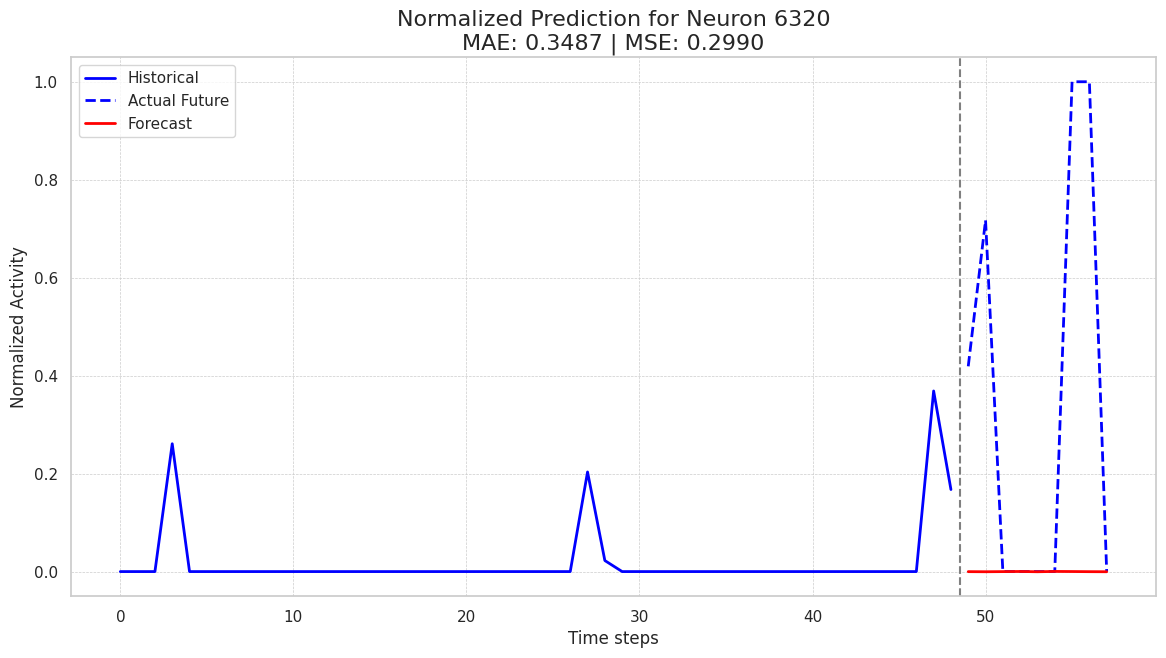


STEP 5: Plotting the original, unnormalized signal for context...


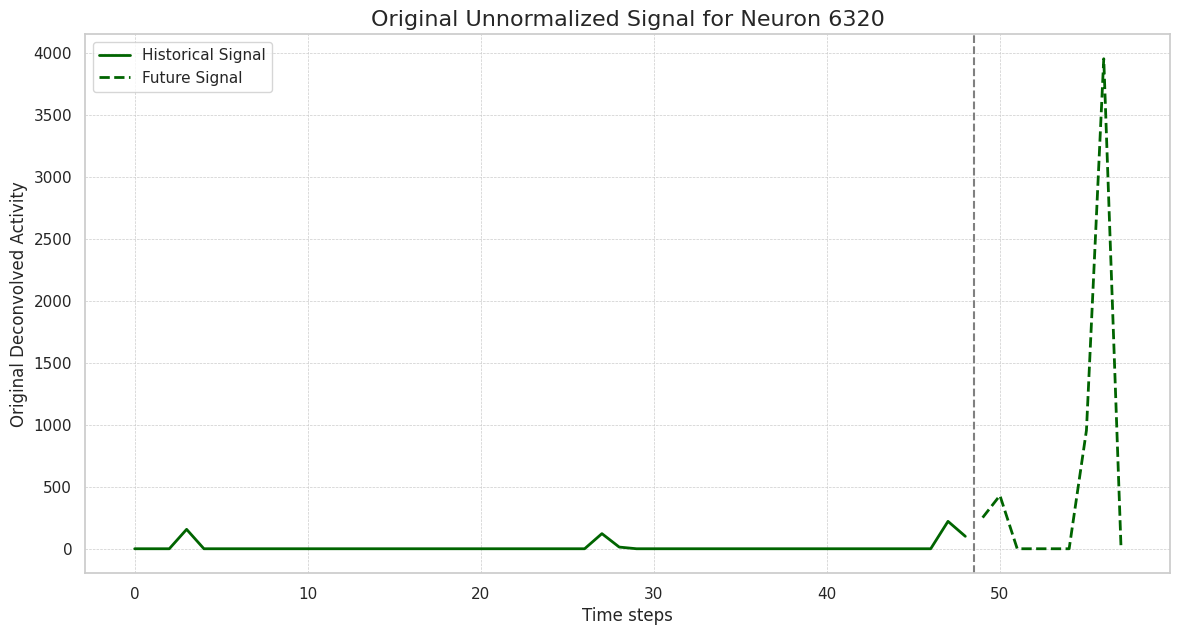

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from transformers import InformerForPrediction

# ===================================================================
# Step 1: Load Model & Set to Evaluation Mode (No Changes)
# ===================================================================
print("STEP 1: Loading trained model...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
output_dir = "./informer_calcium_model"
model = InformerForPrediction.from_pretrained(output_dir)
model.to(device)
model.eval()
print("Model loaded and set to evaluation mode.")


# ===================================================================
# Step 2: Select a Sample & Generate Forecast (No Changes)
# ===================================================================
print("\nSTEP 2: Preparing a sample and generating forecast...")
sample_idx = 500
# We still use past_values to generate the forecast, as this is what the model was trained on.
past_val_sample_for_input = past_values[sample_idx]
future_time_sample_for_input = future_time_features[sample_idx]

inference_input = {
    "past_values": past_val_sample_for_input.unsqueeze(0).to(device),
    "past_time_features": past_time_features[sample_idx].unsqueeze(0).to(device), # Also get the correct time features
    "future_time_features": future_time_sample_for_input.unsqueeze(0).to(device)
}
with torch.no_grad():
    outputs = model.generate(**inference_input)
forecast_sequences = outputs.sequences.mean(dim=1)
print("Forecast generated successfully.")


# ===================================================================
# Step 3: Calculate Performance Metrics & Plot
# ===================================================================
print("\nSTEP 3: Slicing ground truth data and calculating metrics...")

# --- THE FIX: Re-slice the ground truth from the definitive source ---
# This guarantees alignment between the normalized and unnormalized plots.
start_slice = sample_idx
end_slice = sample_idx + past_sequence_length + prediction_length

# Slice the window from the NORMALIZED matrix for the top plot
normalized_window = activity_matrix_normalized[start_slice:end_slice, :]
# Slice the window from the ORIGINAL matrix for the bottom plot
original_window = activity_matrix[start_slice:end_slice, :]

# --- Find an interesting neuron from the CORRECT future data slice ---
# We look for activity in the last `prediction_length` steps of the window.
neuron_to_plot = np.argmax(np.sum(normalized_window[-prediction_length:, :], axis=0))
print(f"Analyzing a specifically active neuron: Neuron {neuron_to_plot}")


# ===================================================================
# Step 4: Plot 1 - Normalized Prediction vs. CORRECT Ground Truth
# ===================================================================
print("\nSTEP 4: Plotting the normalized results...")

# --- Extract data for the chosen neuron from our new, correct slices ---
historical_activity = normalized_window[:-prediction_length, neuron_to_plot][-context_length:]
actual_future_activity = normalized_window[-prediction_length:, neuron_to_plot]
forecast_activity = forecast_sequences.squeeze().cpu().numpy()[:, neuron_to_plot]
print(f"Forecast activity {np.round(forecast_activity,4)}")
print(f"Actual future {np.round(actual_future_activity,4)}")


# --- Calculate metrics using the CORRECT ground truth ---
mae_single_neuron = F.l1_loss(torch.from_numpy(forecast_activity), torch.from_numpy(actual_future_activity)).item()
mse_single_neuron = F.mse_loss(torch.from_numpy(forecast_activity), torch.from_numpy(actual_future_activity)).item()

# --- Plotting ---
historical_time = np.arange(context_length)
future_time = np.arange(context_length, context_length + prediction_length)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(x=historical_time, y=historical_activity, ax=ax, color="blue", label="Historical", linewidth=2)
sns.lineplot(x=future_time, y=actual_future_activity, ax=ax, color="blue", linestyle="--", label="Actual Future", linewidth=2)
sns.lineplot(x=future_time, y=forecast_activity, ax=ax, color="red", label="Forecast", linewidth=2)
ax.axvline(x=context_length - 0.5, color='gray', linestyle='--', linewidth=1.5)

title = (f"Normalized Prediction for Neuron {neuron_to_plot}\n"
         f"MAE: {mae_single_neuron:.4f} | MSE: {mse_single_neuron:.4f}")
ax.set_title(title, fontsize=16)
ax.set_xlabel("Time steps")
ax.set_ylabel("Normalized Activity")
ax.legend(loc="upper left")
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# ===================================================================
# Step 5: Plot 2 - Original Unnormalized Signal (Now Correctly Aligned)
# ===================================================================
print("\nSTEP 5: Plotting the original, unnormalized signal for context...")

# --- Extract from the original_window we sliced earlier ---
original_historical = original_window[:-prediction_length, neuron_to_plot][-context_length:]
original_future = original_window[-prediction_length:, neuron_to_plot]

# --- Plotting ---
fig2, ax2 = plt.subplots(figsize=(14, 7))
sns.lineplot(x=historical_time, y=original_historical, ax=ax2, color="darkgreen", label="Historical Signal", linewidth=2)
sns.lineplot(x=future_time, y=original_future, ax=ax2, color="darkgreen", linestyle="--", label="Future Signal", linewidth=2)
ax2.axvline(x=context_length - 0.5, color='gray', linestyle='--', linewidth=1.5)
ax2.set_title(f"Original Unnormalized Signal for Neuron {neuron_to_plot}", fontsize=16)
ax2.set_xlabel("Time steps")
ax2.set_ylabel("Original Deconvolved Activity")
ax2.legend(loc="upper left")
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()